In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
county ="orange"
county_csv=pd.read_csv(f"Housing Loss Data///{county}_fl_processed_2017_to_2019_20210916.csv")

In [5]:
county_csv.head()

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12095016602,3357,651,2706,1967,1214,67554,263900,1576,2764,...,2.439024,4.276821,0.699432,1.349617,1.801965,0.590182,0.765360,12095,Orange County,Florida
1,12095015902,993,553,440,266,855,56932,338100,1625,872,...,0.000000,0.759047,1.070093,0.239529,1.000920,0.512048,0.425127,12095,Orange County,Florida
2,12095016407,2172,1701,471,286,1197,35095,163600,1373,1374,...,0.212314,3.185925,2.156399,1.005368,3.163526,0.862126,1.343664,12095,Orange County,Florida
3,12095016507,2072,525,1547,1162,1791,98750,251900,1511,1838,...,0.000000,1.665446,0.591989,0.525557,1.091302,0.474930,0.463515,12095,Orange County,Florida
4,12095017501,4829,1110,3719,2950,1086,62167,252200,1705,2241,...,0.215112,4.345114,1.021183,1.371168,2.230643,0.532559,0.947435,12095,Orange County,Florida


In [6]:
county_csv.columns


Index(['census_tract_GEOID', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-evictions', 'total-foreclosure-sales',
       'avg-foreclosure-sales', 

In [7]:
florida = gpd.read_file(f"C://Users//Kavita//Documents//DataDive Sep 2021//Housing Loss Data//{county}_fl_2010_tracts_formatted.geojson")

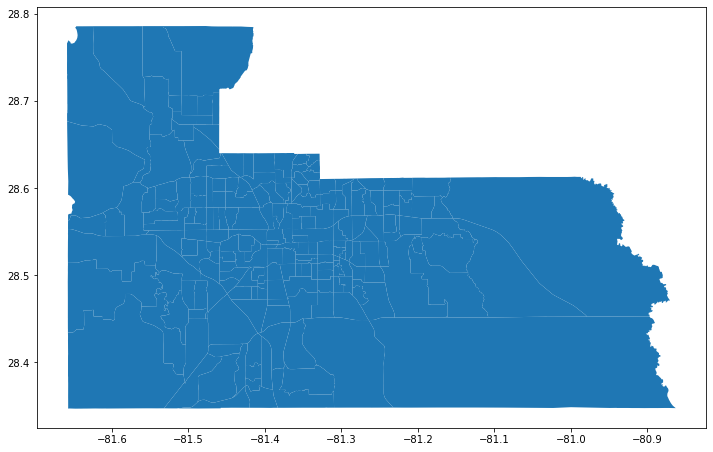

In [8]:
florida.plot(figsize =(12,8));

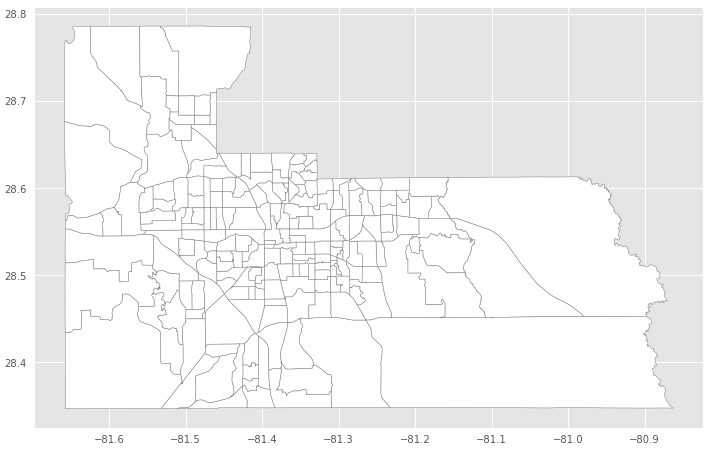

In [9]:
with plt.style.context(("seaborn","ggplot")):
    florida.plot(figsize=(12,8),color="white", edgecolor="grey")

In [10]:
florida.head()

,census_tract_GEOID,geometry
0,12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590..."
1,12095012000,"POLYGON ((-81.45218 28.57349, -81.45219 28.573..."
2,12095016602,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
3,12095014904,"POLYGON ((-81.50493 28.55923, -81.50492 28.558..."
4,12095014702,"POLYGON ((-81.47583 28.53910, -81.47582 28.538..."


In [11]:
county_csv['census_tract_GEOID_int'] =county_csv['census_tract_GEOID'].astype(dtype='int64')

In [12]:
florida['census_tract_GEOID_int'] = florida['census_tract_GEOID'].astype(dtype='int64')

In [13]:
florida_final = florida.merge(county_csv, on="census_tract_GEOID_int", how="left")

In [14]:
print("type of DataFrame :", type(florida_final))

type of DataFrame : <class 'geopandas.geodataframe.GeoDataFrame'>


In [15]:
florida_final.head(1)

,census_tract_GEOID_x,geometry,census_tract_GEOID_int,census_tract_GEOID_y,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590...",12095012402,12095012402,2633,2268,365,117,955,31363,...,0.821918,7.107862,4.257505,2.242995,7.052675,0.958384,2.995527,12095,Orange County,Florida


In [16]:
florida_final.columns

Index(['census_tract_GEOID_x', 'geometry', 'census_tract_GEOID_int',
       'census_tract_GEOID_y', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-

Text(0.5, 1.0, 'eviction filing 2019')

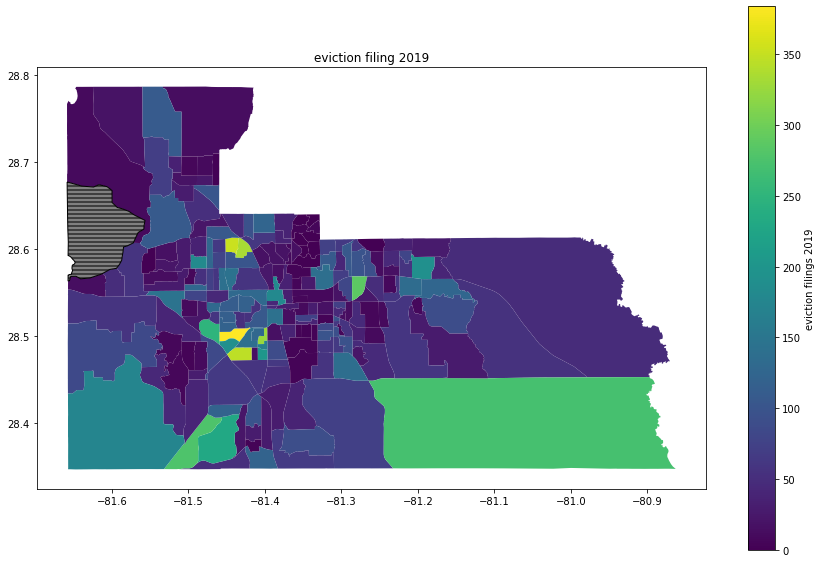

In [17]:
florida_final.plot("eviction-filings-2019", figsize=(15,10), legend =True, 
                   legend_kwds={"label": "eviction filings 2019"},
                   missing_kwds={ "color":"grey",
                                 "edgecolor":"black",
                                 "hatch":"---",
                                 "label":"Missing Values"
                                 })
plt.title("eviction filing 2019")

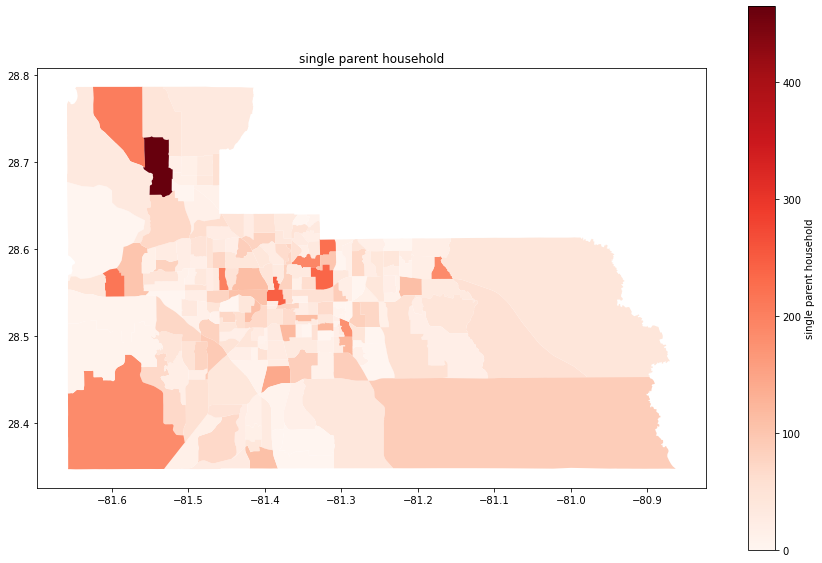

In [18]:
column ="single-parent-household"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                  cmap =plt.cm.Reds, missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

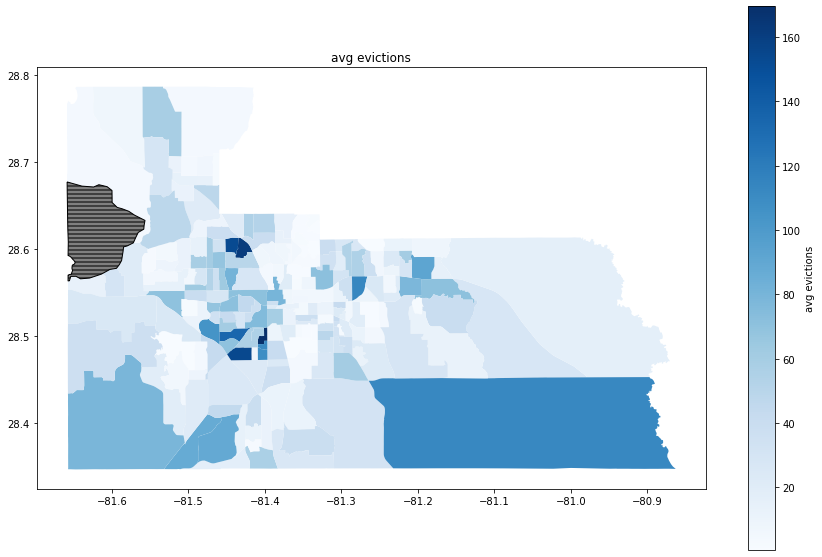

In [19]:
column ="avg-evictions"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                  cmap =plt.cm.Blues, missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

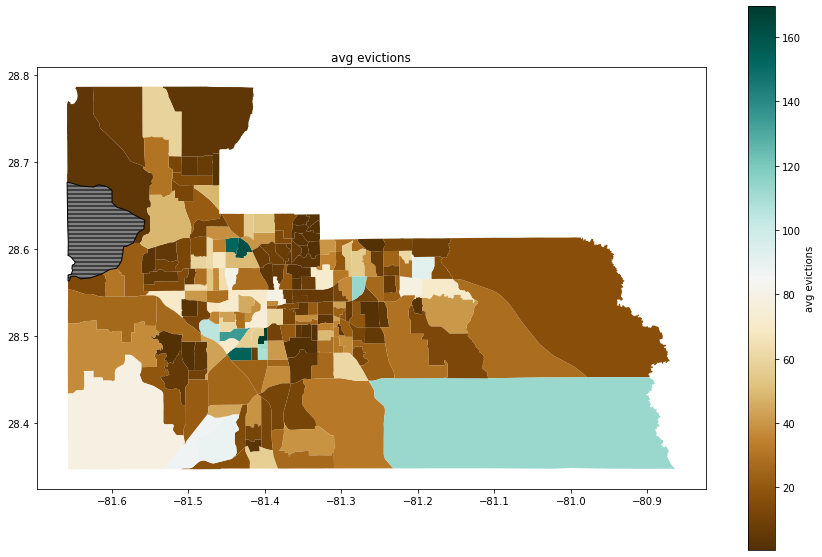

In [20]:
column ="avg-evictions"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                  cmap =plt.cm.BrBG, missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

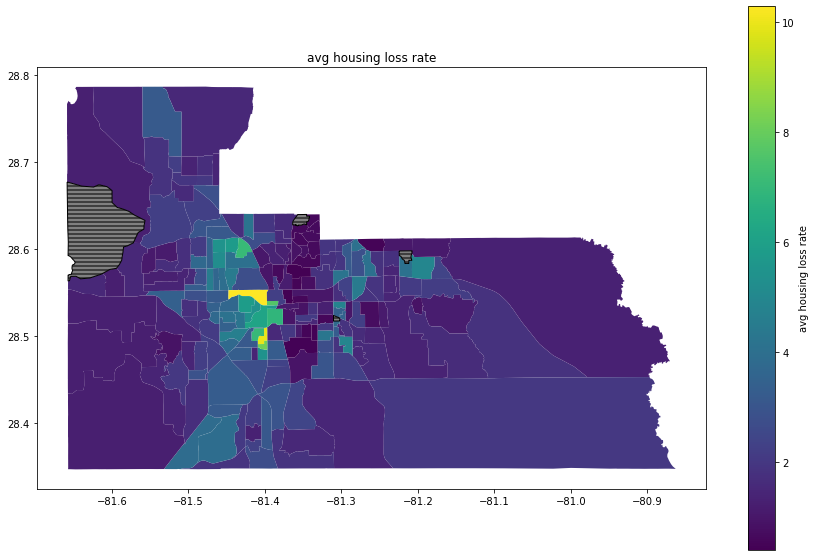

In [21]:
column ="avg-housing-loss-rate"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

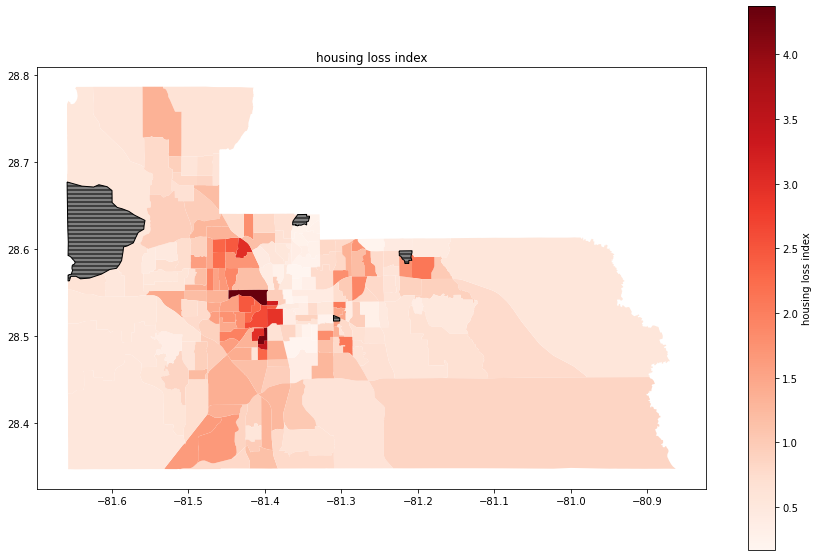

In [22]:
column ="housing-loss-index"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   cmap=plt.cm.Reds,
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

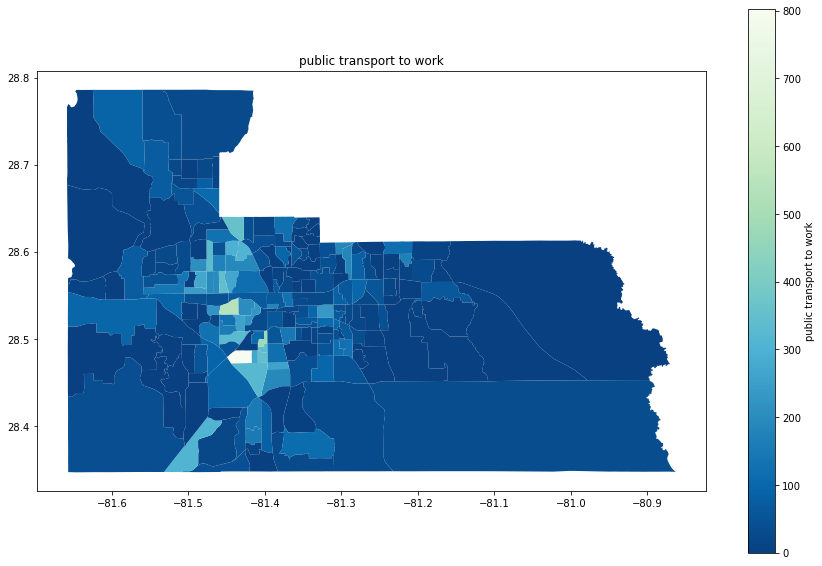

In [23]:
column ="public-transport-to-work"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   cmap=plt.cm.GnBu_r,
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

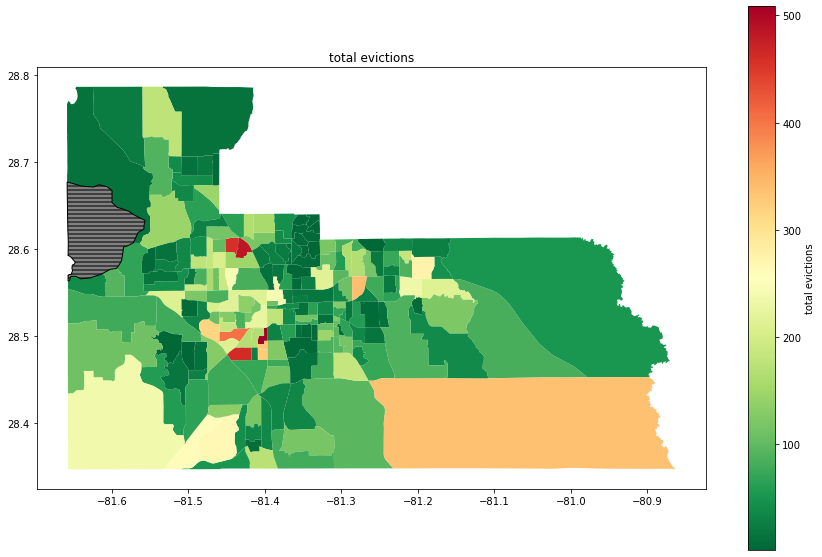

In [24]:
column ="total-evictions"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   cmap=plt.cm.RdYlGn_r,
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

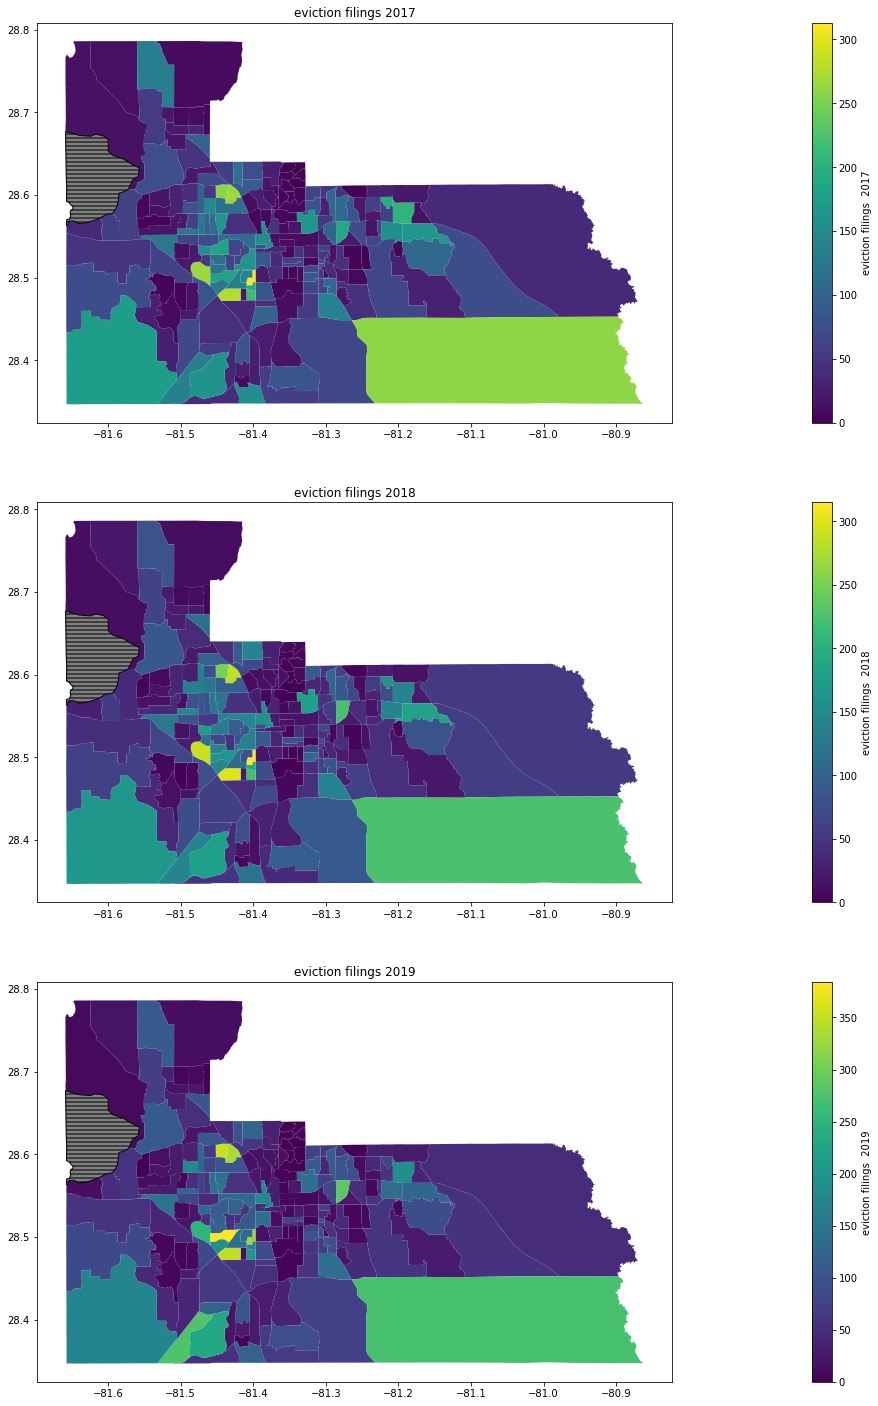

In [25]:
# multi year
column_suffix ="eviction-filings-"

year=2017

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
florida_final.plot(column_suffix+str(year), figsize=(15,10), legend =True,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year)},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year));


ax2=plt.subplot(312)
florida_final.plot(column_suffix+str(year+1), figsize=(15,10), legend =True,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+1)},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+1));


ax3=plt.subplot(313)
florida_final.plot(column_suffix+str(year+2), figsize=(15,10), legend =True,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+2)},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+2));


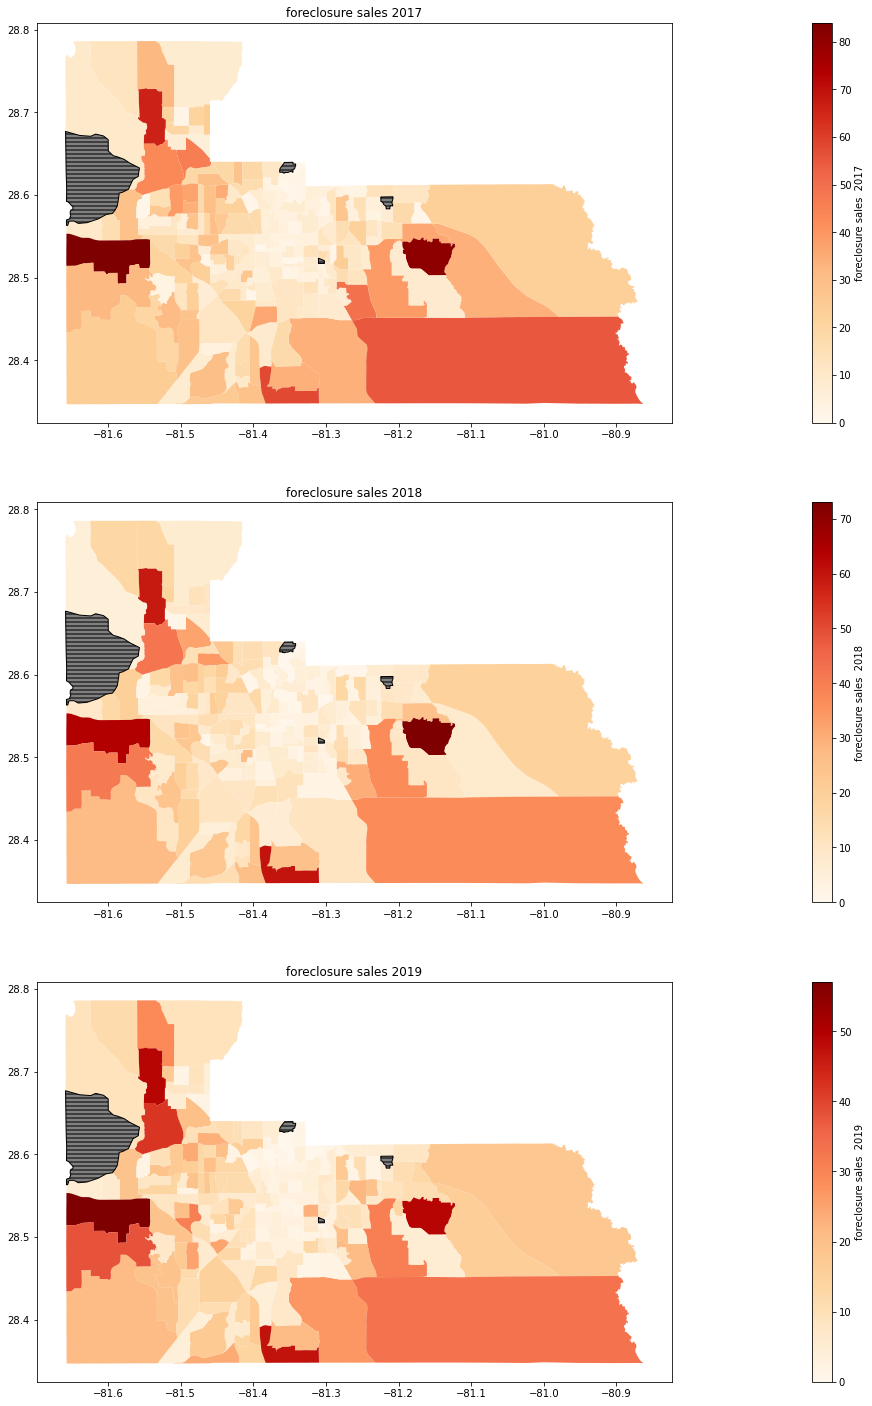

In [26]:
# multi year
column_suffix ="foreclosure-sales-"

year=2017

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
florida_final.plot(column_suffix+str(year), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year)},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year));


ax2=plt.subplot(312)
florida_final.plot(column_suffix+str(year+1), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+1)},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+1));


ax3=plt.subplot(313)
florida_final.plot(column_suffix+str(year+2), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+2)},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+2));


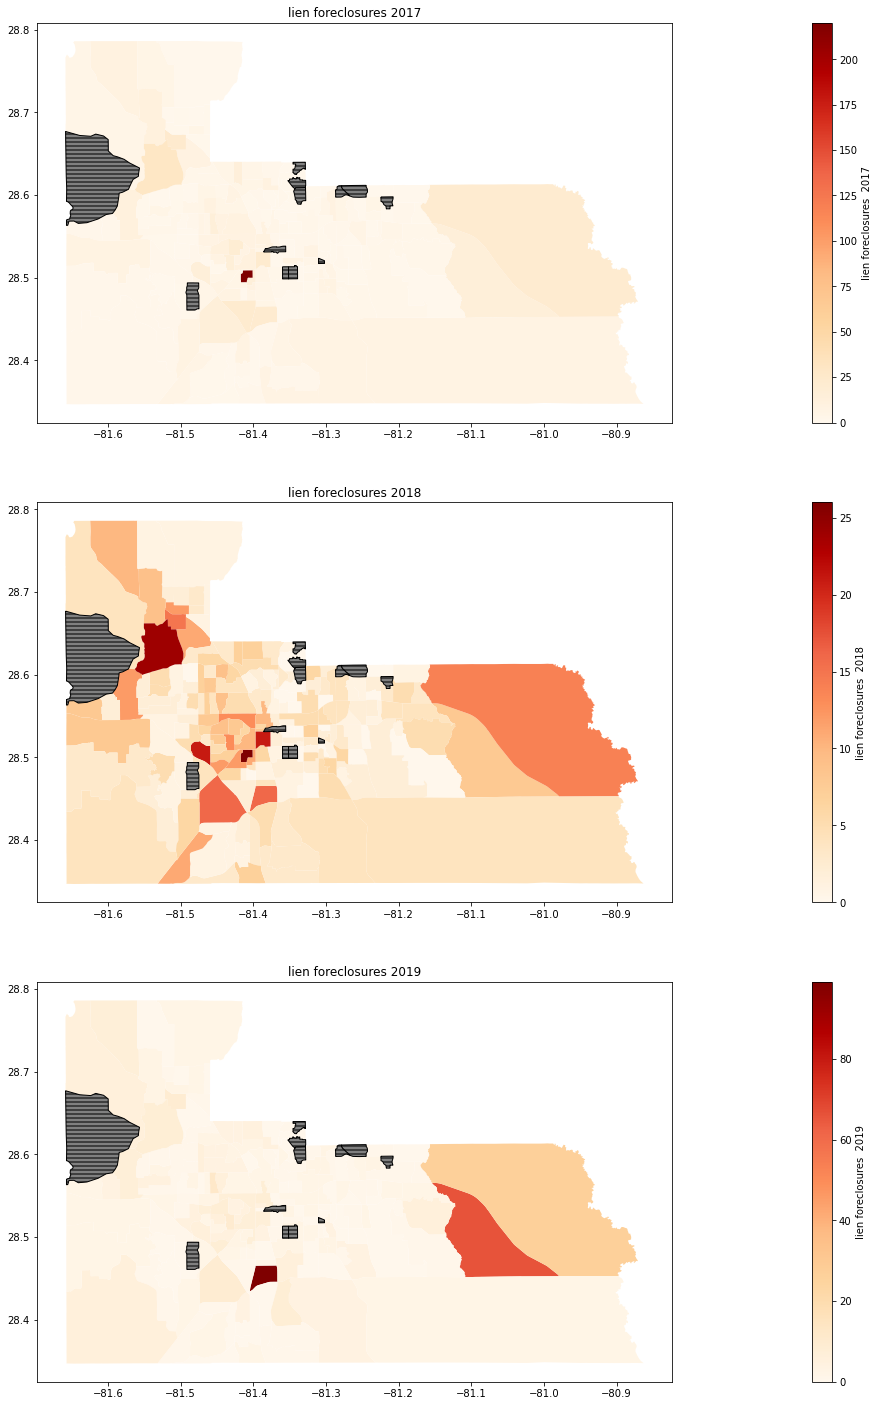

In [27]:
# multi year
column_suffix ="lien-foreclosures-"

year=2017

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
florida_final.plot(column_suffix+str(year), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year)},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year));


ax2=plt.subplot(312)
florida_final.plot(column_suffix+str(year+1), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+1)},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+1));


ax3=plt.subplot(313)
florida_final.plot(column_suffix+str(year+2), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+2)},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+2));


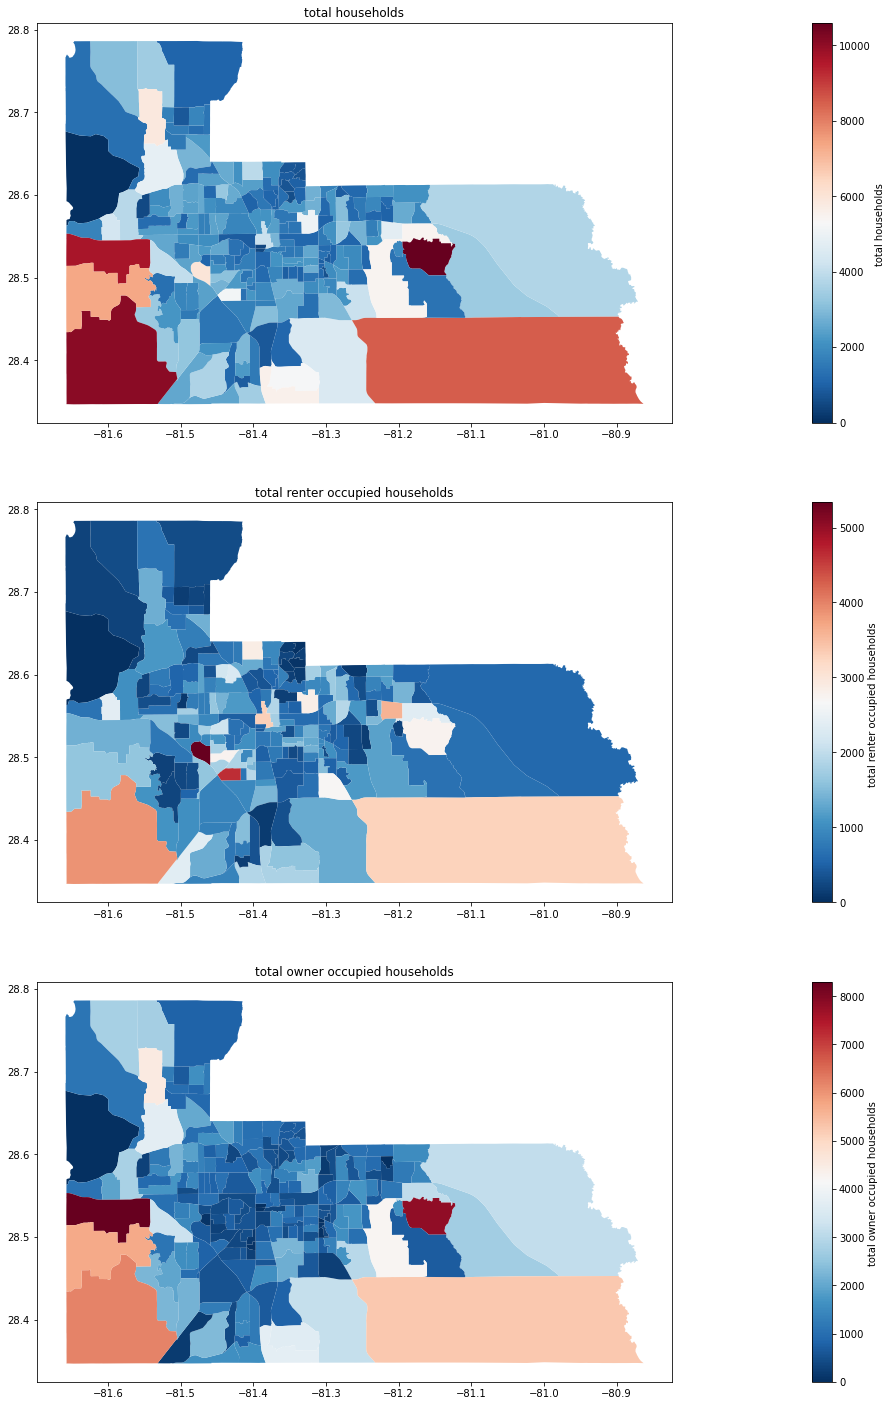

In [28]:
# total-households  total-renter-occupied-households    total-owner-occupied-households

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
column ="total-households"
florida_final.plot(column, figsize=(15,10), legend =True,cmap=plt.cm.RdBu_r,
                  legend_kwds={"label":column.replace("-"," ") + " "},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column.replace("-"," "));
          
ax2=plt.subplot(312)
column ="total-renter-occupied-households"
florida_final.plot(column, figsize=(15,10), legend =True,cmap=plt.cm.RdBu_r,
                  legend_kwds={"label":column.replace("-"," ") + " "},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column.replace("-"," "));
          
ax3=plt.subplot(313)
column ="total-owner-occupied-households"
florida_final.plot(column, figsize=(15,10), legend =True,cmap=plt.cm.RdBu_r,
                  legend_kwds={"label":column.replace("-"," ") + " "},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column.replace("-"," "));